This notebook demonstrates how to reproduce Figure 1 (a, b, c). To generate other figures, simply substitute the appropriate filenames as needed.

In [13]:
%pip install matplotlib seaborn pandas numpy
import os

# Create a directory for the figures if it doesn't exist
os.makedirs("figs", exist_ok=True)


Note: you may need to restart the kernel to use updated packages.


# Fig 1(a)

Successfully loaded data from 'figure_data/rollout_comparison_data_diff_kdv.csv'


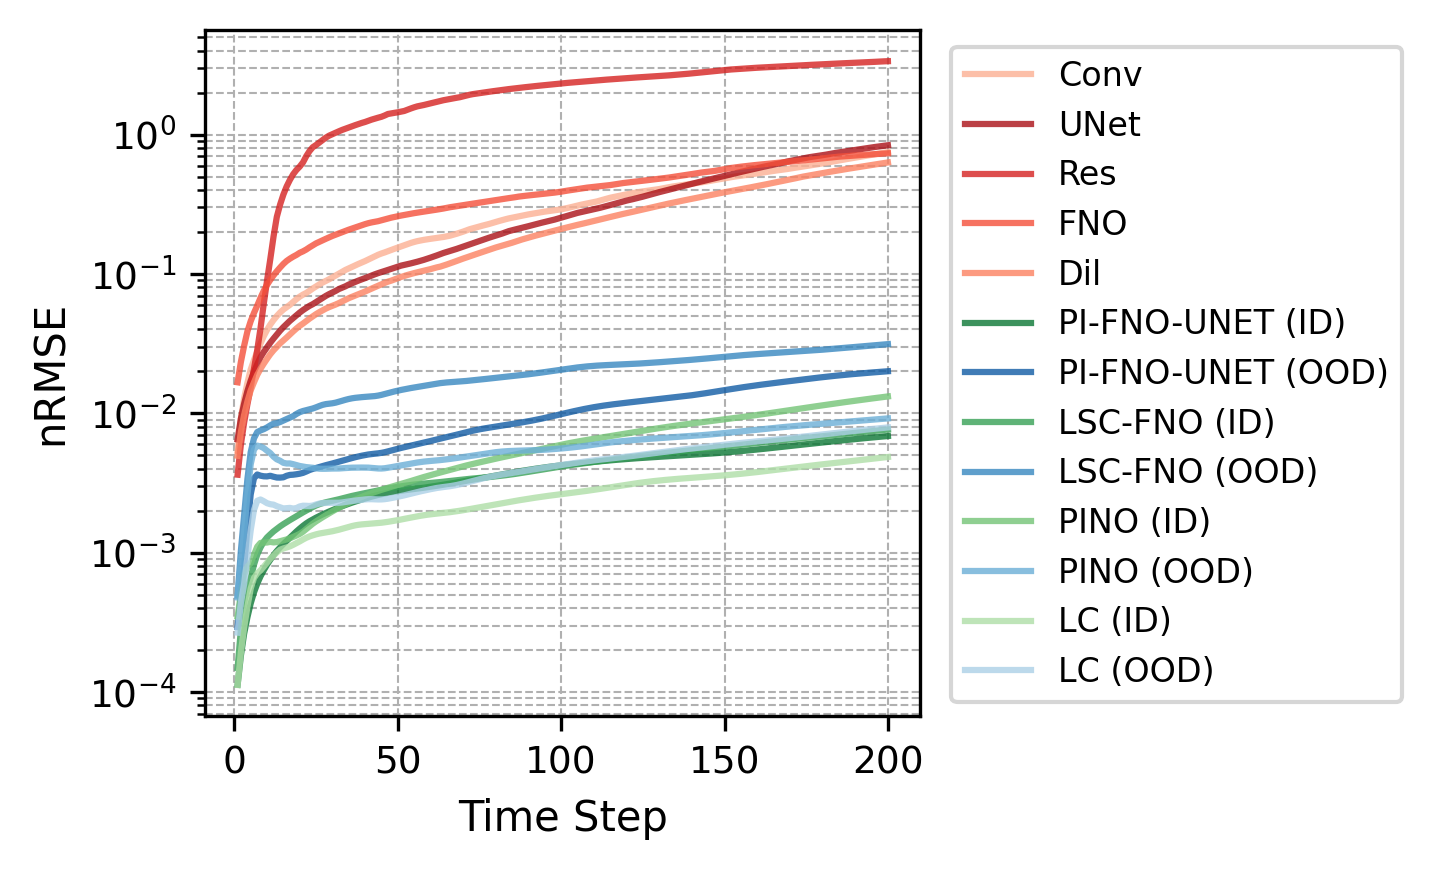

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

csv_filename = "figure_data/rollout_comparison_data_diff_kdv.csv"
try:
    combined_df = pd.read_csv(csv_filename)
    print(f"Successfully loaded data from '{csv_filename}'")
except FileNotFoundError:
    print(f"ERROR: Make sure the file '{csv_filename}' is in the correct directory.")
    combined_df = pd.DataFrame({
        'time_step': [1, 2], 'mean_nRMSE': [0.1, 0.2],
        'publication_net': ['PI-FNO-UNET (ID)', 'FNO;12;18;4;gelu']
    })

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Sans"],
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 12,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 8,
    "legend.title_fontsize": 8,
    "lines.linewidth": 1.5,
    "lines.markersize": 4,
    "figure.figsize": (6, 3),
    "figure.dpi": 300,
})

publication_palette = {}
all_pub_labels = combined_df['publication_net'].unique()
my_models_id_labels = [label for label in all_pub_labels if '(ID)' in label]
my_models_ood_labels = [label for label in all_pub_labels if '(OOD)' in label]
known_labels = set(my_models_id_labels + my_models_ood_labels)
baseline_labels = sorted([label for label in all_pub_labels if label not in known_labels])
display_labels = {}
for label in my_models_id_labels + my_models_ood_labels:
    display_labels[label] = label
for label in baseline_labels:
    if ";" in label:
        short_label = label.split(";")[0]
        display_labels[label] = short_label
    else:
        display_labels[label] = label

id_colors = sns.color_palette("Greens", n_colors=len(my_models_id_labels) + 1)[1:][::-1]
ood_colors = sns.color_palette("Blues", n_colors=len(my_models_ood_labels) + 1)[1:][::-1]
baseline_colors = sns.color_palette("Reds", n_colors=len(baseline_labels) + 1)[1:]
publication_palette.update(zip(my_models_id_labels, id_colors))
publication_palette.update(zip(my_models_ood_labels, ood_colors))
publication_palette.update(zip(baseline_labels, baseline_colors))

plt.figure()
ax1 = sns.lineplot(
    data=combined_df,
    x="time_step",
    y="mean_nRMSE",
    hue="publication_net",
    palette=publication_palette,
    estimator="median",
    alpha=0.8,
    errorbar=None,
)

ax1.set_ylabel("nRMSE")
ax1.set_xlabel("Time Step")
ax1.set_yscale('log')
ax1.grid(True, which="both", ls="--", linewidth=0.5)

handles, labels = ax1.get_legend_handles_labels()
shortened_labels = [display_labels[label] for label in labels]

ax1.legend(
    handles=handles,
    labels=shortened_labels,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.tight_layout(rect=[0, 0, 0.82, 1])
# plt.savefig("figs/fig1a.svg", format='svg', bbox_inches='tight')

# Fig 1(b)

In [8]:
import matplotlib.pyplot as plt
import numpy as np

viz_data_filename = "figure_data/rollout_viz_data_PI-FNO-UNET_diff_kdv_OOD.npz"
try:
    data = np.load(viz_data_filename)
    truth = data['ground_truth']
    prediction = data['model_prediction']
    print(f"Successfully loaded 'ground_truth' and 'model_prediction' from '{viz_data_filename}'")
except FileNotFoundError:
    print(f"ERROR: Make sure the file '{viz_data_filename}' is in the correct directory.")
    truth = np.random.rand(200, 200)
    prediction = np.random.rand(200, 200)

error = np.abs(truth - prediction)

Successfully loaded 'ground_truth' and 'model_prediction' from 'figure_data/rollout_viz_data_PI-FNO-UNET_diff_kdv_OOD.npz'


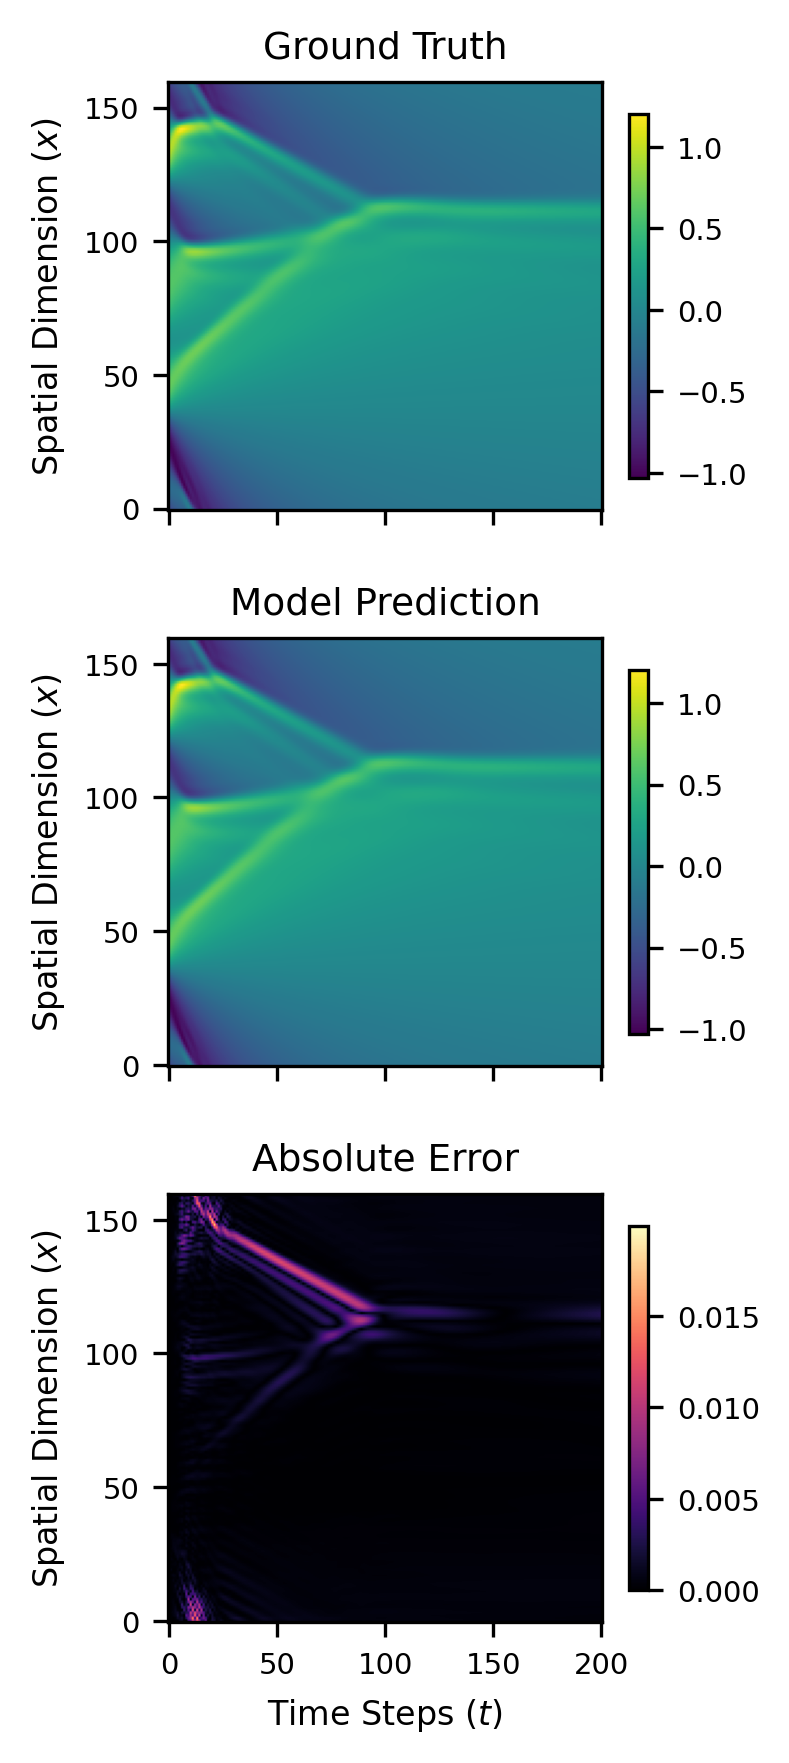

In [10]:
plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Sans"],
    "font.size": 8,
    "axes.labelsize": 8,
    "axes.titlesize": 9,
    "xtick.labelsize": 7,
    "ytick.labelsize": 7,
    "legend.borderpad": 0.02,
    "figure.dpi": 300,
})

# Determine consistent color limits for truth and prediction plots
vmin, vmax = truth.min(), truth.max()

# Create a vertical 3-panel figure with shared x-axis
fig, axes = plt.subplots(3, 1, figsize=(2.8/1.2, 8/1.2), sharex=True, constrained_layout=False)
plt.subplots_adjust(hspace=0.3)  # Reduce spacing between subplots

# Panel 1: Ground Truth (top)
im1 = axes[0].imshow(truth.T, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax, origin='lower')
axes[0].set_title('Ground Truth')
axes[0].set_ylabel('Spatial Dimension ($x$)')
fig.colorbar(im1, ax=axes[0], orientation='vertical', shrink=0.85, pad=0.05)

# Panel 2: Model Prediction (middle)
im2 = axes[1].imshow(prediction.T, aspect='auto', cmap='viridis', vmin=vmin, vmax=vmax, origin='lower')
axes[1].set_title('Model Prediction')
axes[1].set_ylabel('Spatial Dimension ($x$)')
fig.colorbar(im2, ax=axes[1], orientation='vertical', shrink=0.85, pad=0.05)

# Panel 3: Absolute Error (bottom)
im3 = axes[2].imshow(error.T, aspect='auto', cmap='magma', origin='lower')
axes[2].set_title('Absolute Error')
axes[2].set_ylabel('Spatial Dimension ($x$)')
axes[2].set_xlabel('Time Steps ($t$)')
fig.colorbar(im3, ax=axes[2], orientation='vertical', shrink=0.85, pad=0.05)

# Set ticks for all panels
for ax in axes:
    ax.set_xticks(np.linspace(0, truth.shape[0]-1, 5, dtype=int))
    ax.set_yticks([0, 50, 100, 150])

# Save figure
# plt.savefig("figs/fig1b_rotated.svg", format='svg', bbox_inches='tight')
plt.show()

# Fig 1(c)

Successfully loaded main model data from 'figure_data/generalizability_data_models_diff_kdv.csv'
Successfully loaded baseline data from 'figure_data/generalizability_data_baselines_diff_kdv.csv'
Aggregated baseline scores for h-lines: {'Conv;34;10;relu': 0.1395931558757501, 'UNet;12;2;relu': 0.0841196375670038, 'Res;26;8;relu': 0.8839313857041396, 'FNO;12;18;4;gelu': 0.2267206679425043, 'Dil;2;32;2;relu': 0.0663392393277785}


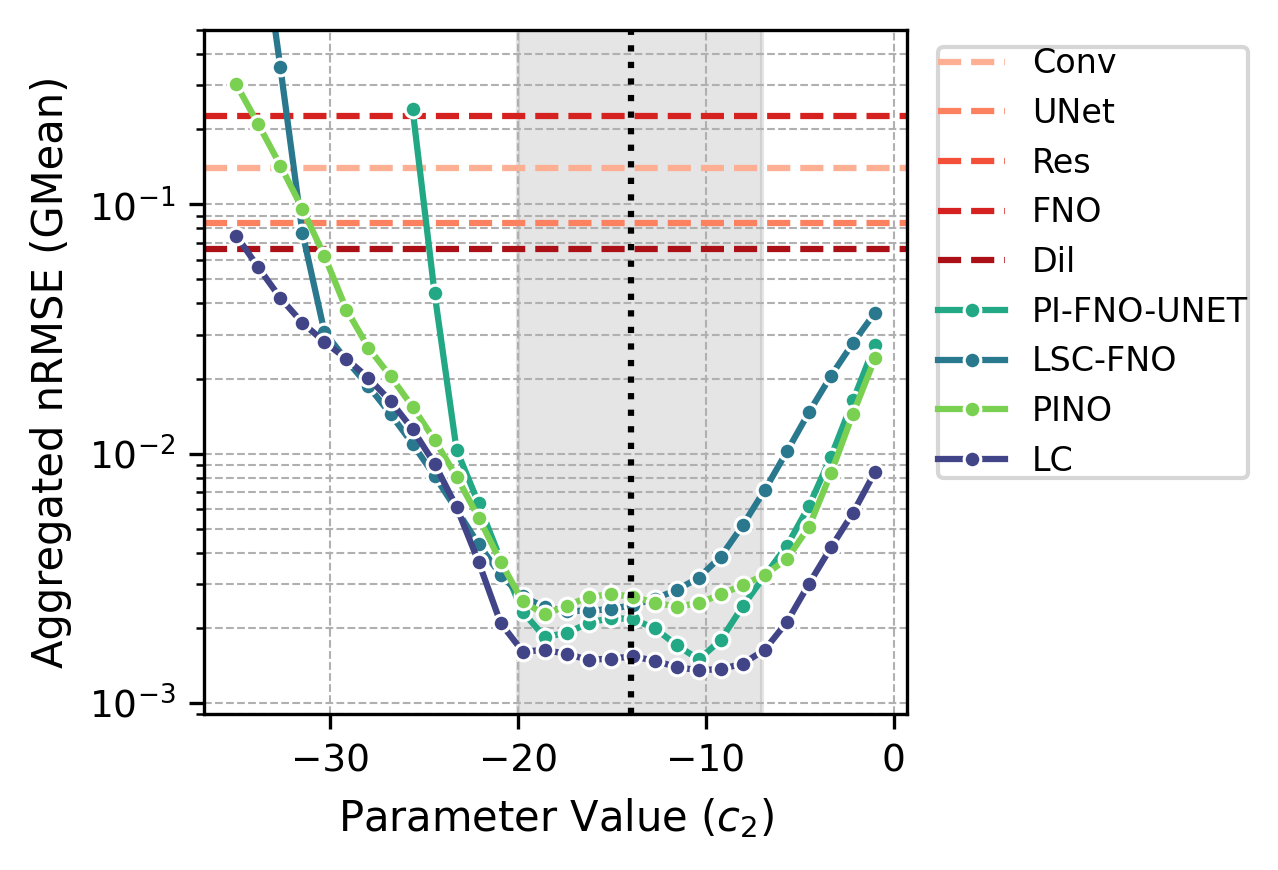

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

models_csv_filename = "figure_data/generalizability_data_models_diff_kdv.csv"
baselines_csv_filename = "figure_data/generalizability_data_baselines_diff_kdv.csv"
scenario_name_gen = "diff_kdv"

try:
    gen_df = pd.read_csv(models_csv_filename)
    print(f"Successfully loaded main model data from '{models_csv_filename}'")
except FileNotFoundError:
    print(f"ERROR: Could not find '{models_csv_filename}'.")
    gen_df = pd.DataFrame()

try:
    baseline_scores_df = pd.read_csv(baselines_csv_filename)
    baseline_scores = dict(zip(baseline_scores_df.model, baseline_scores_df.nrmse))
    print(f"Successfully loaded baseline data from '{baselines_csv_filename}'")
    print(f"Aggregated baseline scores for h-lines: {baseline_scores}")
except FileNotFoundError:
    print(f"NOTE: Could not find '{baselines_csv_filename}'. Plotting without baselines.")
    baseline_scores = {}

plt.rcParams.update({
    "font.family": "serif",
    "font.serif": ["DejaVu Sans"], 
    "font.size": 10,
    "axes.labelsize": 10,
    "axes.titlesize": 12,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "legend.fontsize": 8,
    "legend.title_fontsize": 8,
    "lines.linewidth": 1.5,
    "lines.markersize": 4,
    "figure.figsize": (5.5, 3),
    "figure.dpi": 300,
})

plt.figure()
ax = plt.gca()

if baseline_scores:
    baseline_h_colors = sns.color_palette("Reds", n_colors=len(baseline_scores) + 1)[1:]
    for i, (name, score) in enumerate(baseline_scores.items()):
        ax.axhline(y=score, color=baseline_h_colors[i], linestyle='--', label=name)

if not gen_df.empty:
    model_colors = sns.color_palette("viridis", n_colors=len(gen_df['model'].unique()))
    model_palette = {model: color for model, color in zip(sorted(gen_df['model'].unique()), model_colors)}
    sns.lineplot(
        data=gen_df,
        x='c2',
        y='nrmse',
        hue='model',
        palette=model_palette,
        marker='o',
        ax=ax
    )

ax.axvspan(-20.0, -7.0, color='gray', alpha=0.2)
ax.axvline(x=-14.0, color='black', linestyle=':', linewidth=1.5)

ax.set_yscale('log')
ax.set_xlabel("Parameter Value ($c_2$)")
ax.set_ylabel("Aggregated nRMSE (GMean)")
ax.set_ylim(1e-3 - 1e-4, 5e-1)
ax.grid(True, which="both", ls="--", linewidth=0.5)

handles, labels = ax.get_legend_handles_labels()
order = [l for l in labels]

shortened_labels = []
for label in order:
    if ";" in label:
        shortened_labels.append(label.split(";")[0])
    else:
        shortened_labels.append(label)

handles_ordered = [handles[labels.index(l)] for l in order]
ax.legend(
    handles=handles_ordered,
    labels=shortened_labels,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.tight_layout(rect=[0, 0, 0.8, 1])
# plt.savefig(f"figs/fig1c.svg", format='svg', bbox_inches='tight')
plt.show()